In [2]:
%matplotlib inline

import os 
import glob 
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import scanpy as sc
import time
import datetime
import matplotlib.pyplot as plt
from adjustText import adjust_text


plt.rc('font', size = 8)
plt.rc('font', family='sans serif')
plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42
plt.rcParams['legend.frameon']=False
sns.set_style("ticks")

In [3]:
# aesthetics 
# aesthetics
# aesthetics

cmap_timepoint = {v:sns.color_palette('BuGn')[1:][i] for i,v in enumerate(['5wk', '12wk', '18wk', '24wk', '30wk'])}

cmap_genotime = {}
for g in ['WT', 'SCA1']:
    if g=='WT':
        for i,v in enumerate(['5wk', '12wk', '18wk', '24wk', '30wk']):
            cmap_genotime['{}_{}'.format(g, v)] = sns.cubehelix_palette(5, start=.5, rot=-.75)[i]
    if g=='SCA1':
        for i,v in enumerate(['5wk', '12wk', '18wk', '24wk', '30wk']):
            cmap_genotime['{}_{}'.format(g, v)] = sns.cubehelix_palette(5)[i]
            
cmap_ctype={'Granule cell': '#FAC18A',
            'Unipolar brush cell': '#BA61BA',
            'Purkinje cell': '#EE5264',
            'GABAergic interneuron 1': '#F9EBAE',
            'GABAergic interneuron 2': '#88BB92',
            'GABAergic interneuron 3': '#46A928',
            'Astrocyte': '#F9AEAE',
            'Bergmann glia': '#AEB7F9',
            'Oligodendrocyte progenitor cell': '#F1815F',
            'Oligodendrocyte': '#75A3B7',
            'Microglia': '#AC5861',
            'Pericyte': '#2D284B',
            'Endothelial cell': '#1C67EE',
            'Deep cerebellar nuclei': '#aaaaaa'}

cmap_genotype={'WT':'#010101',
               'SCA1':'#ffd478'}



In [4]:
pfp = '/home/ngr4/project/scnd/results'

In [5]:
dt = pd.read_csv(os.path.join(pfp, 'ignt_7ptest_revision.csv'))

In [6]:
# split up by timepoint and save
dt['abs_ignt'] = dt['adj_ignt'].abs()
for i, t in enumerate(['5wk','12wk','18wk','24wk','30wk']):
    dt.loc[dt['timepoint']==t, :].sort_values(by='abs_ignt', ascending=False).reset_index().to_csv(os.path.join(pfp, 'ignt_7ptest_revision_{}.csv'.format(t)))

In [7]:
if True:
    # drop mito, ribosomal, and MALAT1 genes
#     genes2exclude = [g for g in dt['Gene'] if 'mt-' in g or g.startswith('RPS') or g.startswith('RPL')] + ['MALAT1']
    genes2exclude = [g for g in dt['Gene'] if 'mt-' in g] + ['Malat1']
    dt = dt.loc[(~dt['Gene'].isin(genes2exclude)), :]
dt['abs_ignt'] = dt['adj_ignt'].abs()


In [13]:
np.sort(dt['ctype'].unique())

array(['Astrocyte', 'Bergmann glia', 'Deep cerebellar nuclei',
       'Endothelial cell', 'GABAergic interneuron 1',
       'GABAergic interneuron 2', 'GABAergic interneuron 3',
       'Granule cell', 'Microglia', 'Oligodendrocyte',
       'Oligodendrocyte progenitor cell', 'Pericyte', 'Purkinje cell',
       'Unipolar brush cell'], dtype=object)

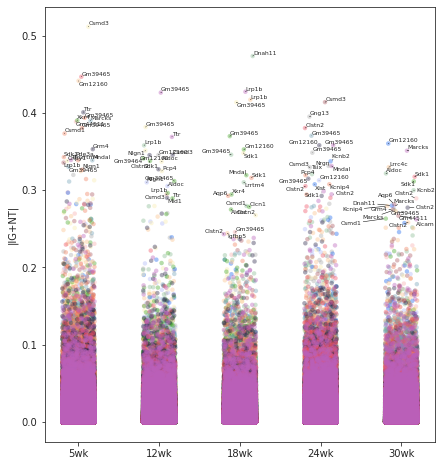

In [14]:

topn = 20
fig, ax = plt.subplots(1,1, figsize=(7,8))
for i, t in enumerate(['5wk','12wk','18wk','24wk','30wk']):
    dtt = dt.loc[dt['timepoint']==t, :].sort_values(by='abs_ignt', ascending=False).reset_index()
    X = np.array([i]*dtt.shape[0]) + np.random.uniform(-.2, .2, size=(dtt.shape[0],))
    for c in np.sort(dt['ctype'].unique()):
        c_idx = np.where(dtt['ctype']==c)[0]
        ax.scatter(X[c_idx], dtt['abs_ignt'][c_idx], c=cmap_ctype[c], label=c, s=20, alpha=0.4, rasterized=True, edgecolor='none')
    texts = [ax.text(X[ii], dtt.loc[ii, 'abs_ignt'], dtt.loc[ii, 'Gene'], fontsize=6) for ii in range(topn)]
    adjust_text(texts,arrowprops=dict(arrowstyle="-", color='k', lw=0.5), ax=ax)
ax.set_xticks(list(range(5)))
ax.set_xticklabels(['5wk','12wk','18wk','24wk','30wk'])
ax.set_ylabel('|IG+NT|')
ax.legend(bbox_to_anchor=(1.01,1))
fig.savefig(os.path.join(pfp, 'female_adj_abs_ignt_pertimepoint_test7p.pdf'), bbox_inches='tight', dpi=600)




